**Sales prediction involves using various statistical techniques and machine learning models to estimate future sales based on historical data.**

In [18]:
import pandas as pd

In [2]:
# Loading the dataset

sales = pd.read_csv('/content/advertising.csv')
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [20]:
# Dimension of the dataset

sales.shape

(200, 4)

In [21]:
# Statistics of the dataset

sales.info()
sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Data Preprocessing

In [3]:
# Checking for missing values

print(sales.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


Visualisation

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

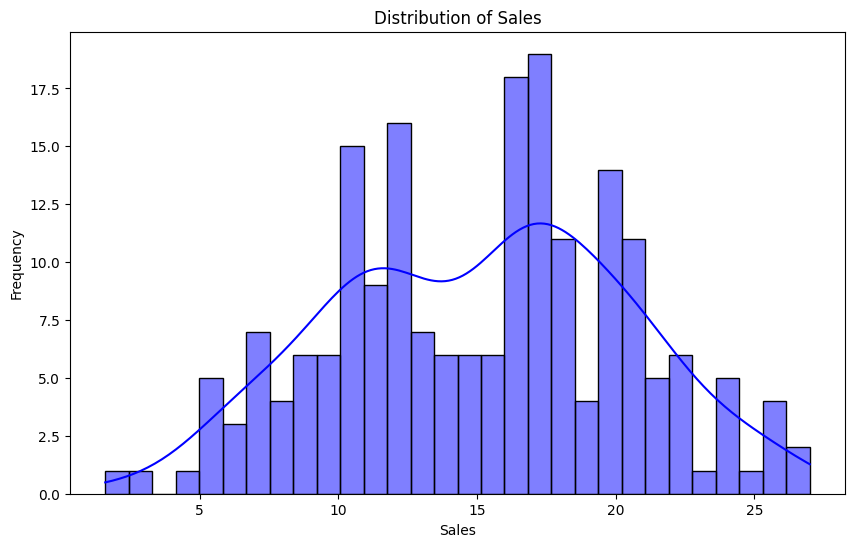

In [25]:
# Distribution of the target variable 'Sales'

plt.figure(figsize=(10, 6))
sns.histplot(sales['Sales'], kde=True, bins=30, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

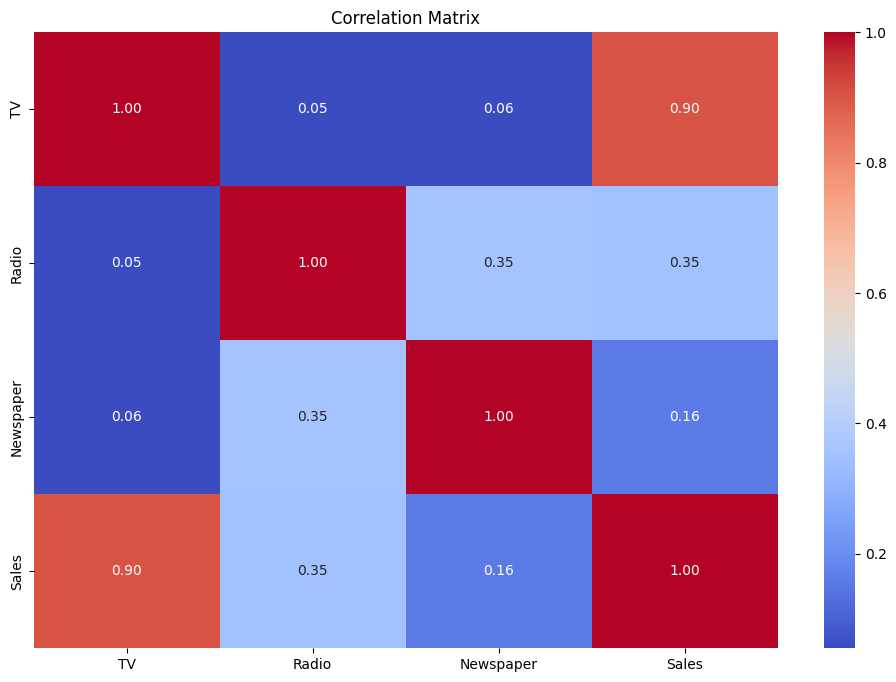

In [26]:
# Correlation matrix to understand relationships between variables

plt.figure(figsize=(12, 8))
sns.heatmap(sales.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

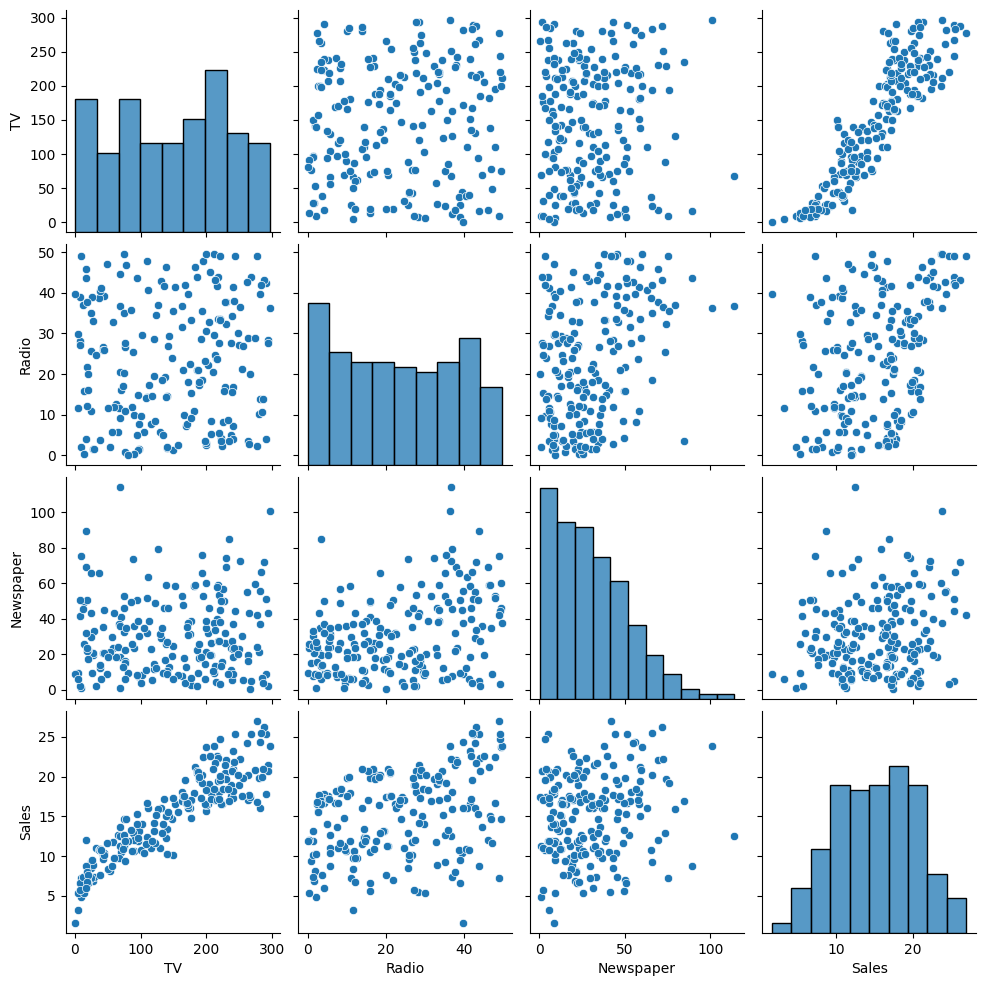

In [27]:
# Pairplot to see relationships and distributions for multiple variables

sns.pairplot(sales)
plt.show()

Modeling

In [5]:
# Separating features and target variable

x = sales.drop('Sales', axis=1)
y = sales['Sales']

In [8]:
# Spliting the data into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
# Linear Regression model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [22]:
# Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error: 2.9077569102710927
R² Score: 0.9059011844150825


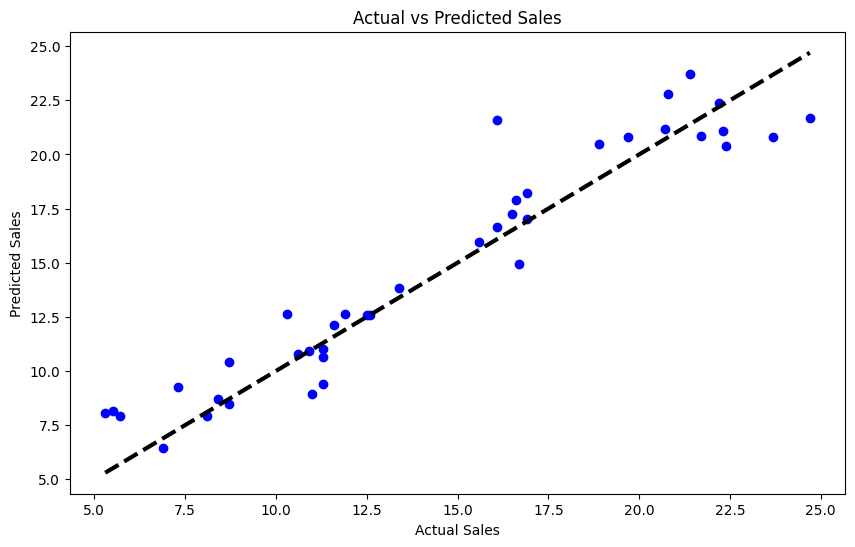

In [28]:
# Predicting the sales on the test set

y_pred = model.predict(x_test_scaled)


# Calculating the Mean Squared Error and R² score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


# Plotting the predictions vs actual sales

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()